In [1]:
#Für das Einstellen des Themes
#pip install jupyterthemes
#jt -t grade3/chesterish -T -N -kl
#https://towardsdatascience.com/customize-your-jupyter-notebook-theme-in-2-lines-of-code-fc726cea1513

<h1>Partitionierende Clusteranalyse</h1>
<h2>Generierung der Datensätze</h2>

Bevor mit dem partitionierenden Clustering begonnen werden kann, wird ein Datensatz benötigt. Dieser wird in diesem Beispiel mit Hilfe der make_blobs Methode erzeugt. <br>

<table style="width:100%">
    <caption style="color:white">Parameter der make_blobs Methode</b></caption>
  <tr>
    <th style="text-align: left">Parameter</th>
    <th style="text-align: left">Bedeutung</th>
    <th style="text-align: left">Wert</th>
  </tr>
  <tr>
    <td style="text-align: left">n_samples</td>
    <td style="text-align: left">Wie viele Datensätze sollen angelegt werden?</td>
    <td style="text-align: left">1000</td>
  </tr>
  <tr>
    <td style="text-align: left">n_features</td>
    <td style="text-align: left">Wie viele Merkmale soll jeder Datensatz beinhalten?</td>
    <td style="text-align: left">5</td>
  </tr>
  <tr>
    <td style="text-align: left">centers</td>
    <td style="text-align: left">Wie viele Zentren (Zielklassen) sollen gebildet werden?</td>
    <td style="text-align: left">4</td>
  </tr>
  <tr>
    <td style="text-align: left">cluster_std</td>
    <td style="text-align: left">Wie groß ist die Standabweichung?</td>
    <td style="text-align: left">3</td>
  </tr>
  <tr>
    <td style="text-align: left">random_state</td>
    <td style="text-align: left">Durch diesen Parameter bleibt der Rückgabewert bei wiederholtem Methodenaufruf konstant.</td>
    <td style="text-align: left">0</td>
   <tr>
    <td style="text-align: left">center_box</td>
    <td style="text-align: left">In welchem Bereich sollen die Merkmalswerte erzeugt werden?</td>
    <td style="text-align: left">0 bis 20 (Fließkommazahlen)</td>
  </tr>
  </tr>
</table>

In dem folgenden Szenario stellen die 1000 Datensätze 1000 Kunden einer Bank dar. Die Zentren, bzw. Zielklassen, zu welchen sich die Datensätze zuordnen lassen, werden zur Veranschaulichung im Folgenden (in Anlehnung an das Bankszenario) als Bonitätsklassen bezeichnet.

In [2]:
from sklearn.datasets import make_blobs

center_box = (0, 20)

X , y= make_blobs(n_samples = 1000,center_box=center_box, n_features=5, centers=4, cluster_std=3, random_state=0)

print(' Datensätze '.center(80, '*'))
print(f'{X} \n')
print(' Zielklassen '.center(80, '*'))
print(y)

********************************** Datensätze **********************************
[[14.2900055  11.2593096  10.24827196 13.66188885  9.85553942]
 [11.681067    7.54136667 12.34537436 17.18574985  8.40912845]
 [14.59321328  9.06550215 15.19647879 21.32842795 -6.72811976]
 ...
 [ 2.06903181 -4.08186468 15.21229594 21.04946131 15.03603886]
 [13.09353384 16.03137763 10.35870238 21.23490864 -1.08959196]
 [-0.66713243 -2.36153503 21.97456592 15.64940373 19.05913451]] 

********************************* Zielklassen **********************************
[0 1 2 0 0 3 2 0 3 2 3 3 1 1 3 0 1 2 1 2 0 0 2 1 3 0 3 3 3 1 2 3 0 1 3 2 3
 2 2 3 3 3 3 2 1 3 1 3 1 2 1 2 0 2 2 2 0 3 0 3 2 3 3 1 2 1 0 1 2 2 3 2 0 2
 0 3 3 1 2 0 2 0 3 0 1 0 1 1 2 3 0 3 1 0 1 0 1 2 0 3 2 1 2 3 2 3 1 1 2 2 3
 1 2 2 2 1 2 3 1 3 2 1 3 0 2 3 0 0 0 0 0 0 3 3 3 3 1 3 1 3 3 1 2 1 0 3 1 0
 3 0 3 2 0 2 2 0 2 3 0 3 1 2 1 3 2 2 2 0 3 0 2 2 3 1 1 3 1 3 1 3 2 0 2 0 2
 2 2 1 1 1 3 0 1 1 1 3 3 2 2 1 1 3 3 1 1 1 2 3 0 3 0 1 3 0 3 2 0 2 1 2 0 0
 0

X: Ein Zweidimendionales ndArray, welches die erzeugten Datensätze mit ihren Merkmalen beinhaltet. <br>
Y: ndArray mit Ganzzahlen, welche die Zugehörigkeit des einzelnen Datensatzes zur tatsächlichen Zielklasse beeinhaltet.

<h2> Visualisierung der Abhängigkeiten</h2> <br>
Um die Daten mit der pariplot Methode darstellen zu können, müssen diese in ein DataFrame Objekt umgewandelt werden.<br>
Ein DataFrame ist eine zweidimensionale, tabellarische Struktur mit beschrifteten Achsen (Zeilen und Spalten). 
Die einzelnen Zeilen stellen hier die jeweiligen Datensätze da, während die Spalten die jeweiligen Merkmale des Datensatzes darstellen.
Standardmäßig sind die Zeilen und Spalten mit 0,1,2,3,...,n beschriftet. Im Folgenden werden die Spaltenbeschriftungen zur Verdeutlichung der Situation entsprechend angepasst. Die einzelnen Werte der Merkmale weichen hier allerdings von der Realität ab.

In [3]:
import pandas as pd

df = pd.DataFrame(X, columns = ['Gehalt', 'Alter', 'Disporahmen', 'Kontostand', 'Zahlungsverpflichtungen']) 
df['Bonitätsklasse'] = y
print(df)

        Gehalt      Alter  Disporahmen  Kontostand  Zahlungsverpflichtungen  \
0    14.290005  11.259310    10.248272   13.661889                 9.855539   
1    11.681067   7.541367    12.345374   17.185750                 8.409128   
2    14.593213   9.065502    15.196479   21.328428                -6.728120   
3     9.938325  12.912999    13.499712    6.275273                 8.662882   
4    12.348517  11.409951     9.707380   10.566496                 5.309211   
..         ...        ...          ...         ...                      ...   
995   9.726795   7.458455    19.553714   21.305926                11.590382   
996  10.605529   7.309208    19.946217   22.060691                 8.782348   
997   2.069032  -4.081865    15.212296   21.049461                15.036039   
998  13.093534  16.031378    10.358702   21.234909                -1.089592   
999  -0.667132  -2.361535    21.974566   15.649404                19.059135   

     Bonitätsklasse  
0                 0  
1      

<h3>Visualisierung mit Pairplot</h3>
Zur Visualisierung der Verteilung von Datensätzen anhand ihrer Merkmale können verschiedene Methoden angewandt werden. 
Im Folgenden wurde der Dataframe der Pairplot Methode alsParameter übergeben. Als Rückgabewert der Methode werden immer zwei Merkmale (in Form von Streudiagrammen) zueinander in Beziehung gesetzt.
Dies erfolgt dann für jede mögliche Kombination, sodass bei fünf Merkmalen eine 5x5 Matrix entsteht. Mit dem zusätzlichen Paramerter "hue" werden die Zielklassen eingefärbt.

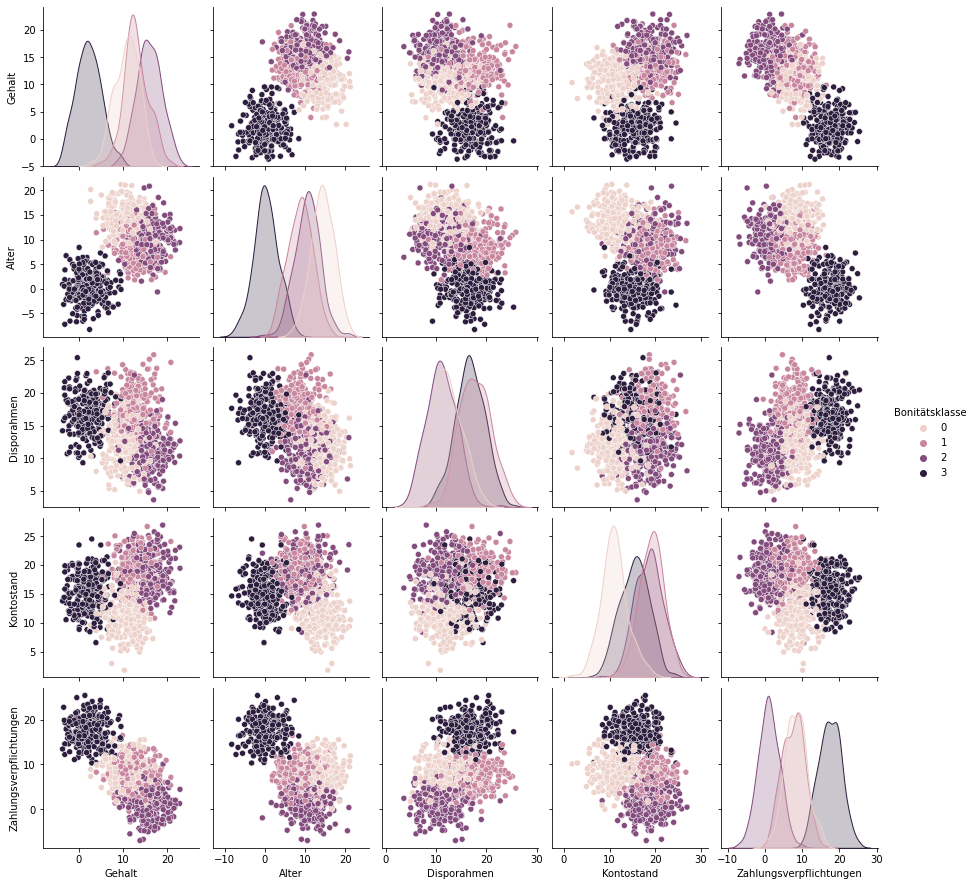

In [4]:
from seaborn import pairplot

pairplot(df, hue = 'Bonitätsklasse')

<h3>Visualisierung mit Scatterplot</h3>
Im nächsten Schritt werden die Datensätze fünfdimensional dargestellt. Die Merkmale "Gehalt", "Alter" und "Disporahmen" werden an der X, Y und Z-Achse abgebildet. Das Merkmal "Kontostand" wird über die Farbe (je dunkler desto höher der Wert) und das Merkmal "Zahlungsverpflichtungen" über die Größe modelliert (je größer desto höher der Wert). Über Farbe und Größe können so die vierte und fünfte Dimension simuliert werden.
Um das untere Codesnippet ausführen zu können, ist die Installation der "plotly" Bibliothek erforderlich (pip install plotly).
Quelle: https://github.com/ostwalprasad/PythonMultiDimensionalPlots

In [5]:
import plotly
import plotly.graph_objs as go

data = df

#Setzen der marker properties
markersize = data['Kontostand']
markercolor = data['Zahlungsverpflichtungen']

#Erstellen der Plotly figure
fig1 = go.Scatter3d(x=data['Gehalt'],
                    y=data['Alter'],
                    z=data['Disporahmen'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Erstellen des Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Gehalt"),
                                yaxis=dict( title="Alter"),
                                zaxis=dict(title="Disporahmen")),)

#Ausgabe als html Datei
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5D Plot.html"))

'5D Plot.html'

<h2> Partionierendes Clustern </h2><br>

<ol>
    <li>
        Zuerst werden 4 beliebige Werte/Datensätze ausgewählt denen die Datensätze nach Nähe zugeordnet werden. 
    </li>
    <li>
Infolgedessen werden die Centroide neu berechnet.
    </li>
    <li>
Je nach Distanz werden die Datensätze neu zugeordnet.
    </li>
    <li>
Dieser Vorgang wiederholt sich solang, bis ein Endkriterium erreicht ist. </li>
</ol>  

Der Methode KMeans wurden hier zwei Parameter übergeben: Die Anzahl der Cluster und ein Integer für random_state damit bei wiederholtem Methodenaufruf die selben Zentroide gewählt werden. Mit den Methodenaufruf fit() übergeben wir als Parameter das Data Set welches geclustert werden soll. <br/>
Die Variable "kmeans" stellt das Modell dar, welches durch das Data Set trainiert werden soll.
Mit kmeans.predict() kann dann trainierte Model an einem Datenbestand angewendet werden.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

y_kmeans=kmeans.predict(X)


<h3>Angleichen der Bezeichnungen von Zielklassen und durch KMeans gebildeten Cluster</h3>
Da KMeans nicht die Bezeichnungen der Zielklassen kennt, stimmen die Bezeichnungen der Cluster eventuell nicht mit denen der Zielklassen überein. Zur Verdeutlichung: Es ist nicht zwangsläufig der Fall, dass KMeans unter den Cluster "0" die selben Werte subsumiert, wie es die make_blobs Methode bei der Zielkasse "0" tat. Auf unser Beispiel bezogen könnte es somit sein, dass KMeans unter den Cluster "0" Datensätze mit einer sehr schlechten Bonität einordnet, unsere Zielklasse dort im Gegensatz dazu aber eine sehr gute Bonität. Um Zielklassen und durch KMeans gebildete Cluster miteinander vergleichen zu können, werden in dem folgenden Schritt die Bezeichnungen der gebildeten Cluster and die Bezeichnungen der Zielklassen angeglichen:

In [7]:
from scipy.stats import mode
from numpy import zeros_like

labels = zeros_like(y_kmeans)
for i in range(4):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]
    print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Zunächst wird mit dem Methodenaufruf numpy.zeros_like(y_kmeans) ein ndArray gebildet, welches die selben Maße wie das übergebene Array beinhaltet. Befüllt ist jenes Array zum Zeitpunkt der Initialisierung ausschließlich mit Nullen. Am Ende wird das ndArray die Werte der Zielklassen beinhalten, allerdings an die Bezeichnungen der Cluster angeglichen.<br>
Anschließend durchläuft eine Zählvariable die Zahlen 0 bis 3 (unsere Zielklassen) in einer Schleife. In der Variable "mask" wird ein Array mit boolschen Werten gespeichert. Durch den Ausdruck "(y_kmeans == i)" sind die Werte des Arrays an den Stellen "true", an denen die Stellen des ndArray "y_kmeans" mit dem Wert der Zählvariable übereinstimmen. Im ersten Durchlauf der Schleife hätte das Array "mask" somit nur an den Stellen den Wert "true", an denen ein Datensatz durch KMeans in den Cluster "0" eingeordnet wurde. <br>
Im zweiten Schritt werden nun die Nullen im ndArray "labels" mit den Werten der jeweiligen (an die Bezeichnung der durch KMeans gebildeten Cluster angeglichenen) Zielklasse überschrieben. Zuerst mit der Zielklasse 0, dann mit der Zielklasse 1 usw. Möglich ist dies, da wir einem ndArray als Index ein boolsches Array mitegeben können. Indiziert werden in dem Array somit jene Werten an den Stellen, an denen das als Index übergebene Array den Wert "true" zurück gibt.<br>
Die Anpassung der Bezeichnung der scipy.stats.mode Methode. Diese Methode liefert ein Array mit dem Modus des übergebenen Arrays zurück. Als Parameter übergeben wir hier das ndArray "y", welches die Zielklassen beinhaltet. Als Index übergeben wir auch hier das selbe boolsche Array wie bei dem ndArray "labels". Somit wird der in dem ndArray "y" der häufigste Wert an den Stellen gesucht, an denen KMeans die jeweilige Clusterbezeichnung der Zählvariable zugeteilt hat. Da die Abweichungen von Zielklassen und gebildeten Cluster gewöhnlich den Modus nicht verfälschen dürfte, kann so zuverlässig die eigentliche Bezeichnung des gebildeten Clusters herausgefunden werden. <br>
Da wir als Paramter ein eindimensionales Array übergeben, beinhaltet das Rückgabearray nur einen Wert. Auf jenen können wir somit direkt mit dem Index "0" zugreifen. (Bei einem zweidimensionales Array hätte das Rückgabearray eine Länge von 2, usw.) Dieser Wert wird nun an die Stellen eingesetzt, an welchen y_kmeans eine Clustergruppe verordnet hat. Somit wurde die Bezeichnung der von KMeans gebildeten Cluster an die Bezeichnung der Zielklassen angeglichen, ohne die Ergebniss zu verfälschen.

<h3>Güte</h3>

In Python lässt sich die Güte mit Hilfe der Methode accuracy_score berechnen. Als Parameter wurden der Methode die tatsächlichen Zielklassen und die durch KMeans gebildeten Cluster übergeben
Die Methode berechnet die Genauigkeit mit der folgenden Formel: <br/>
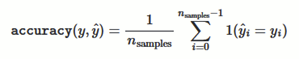 <br/>
Eine vereinfachte Berechnung wäre, wenn die tatsächlichen Werte durch alle Vorhersagen dividiert werden.
Je höher die Accuracy, desto besser. Insgesamt ist die Güte selbst ungenauer als die Konfusionsmatrix.
In unserem Fall haben wir eine Accuracy von 0.953 also 95,3%.

In [8]:
from sklearn.metrics import accuracy_score

print(f'Die Güte beträgt: {accuracy_score(y, labels)}')

Die Güte beträgt: 0.953


<h2>Konfusionsmatrix</h2>
Die Konfusionsmatrix wird nur benutzt, um zu klassifizieren, sie sagt keine numerischen Werte voraus. 

<h3>Beispiel:</h3>
Schauen wir zuerst auf ein Beispiel einer 2x2 Konfusionsmatrix. 

 Wir sehen hier eine Matrix mit insgesamt 165 einsortierten Fällen. Nehmen wir einmal an es handelt sich um eine Angabe der Genauigkeit eines Testes, ob ein Mensch erkrankt ist oder nicht. In diesem Fall würde Ja für positiv getestet und Nein für negativ getestet stehen. Wir hätten mit unserem Test 110 als negativ eingestuft, obwohl 105 wirklich nicht erkrankt sind und wir haben 55 positiv getestet, obwohl 60 erkrankt sind. <br/>
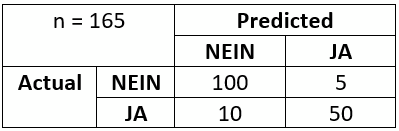<br/>
Daraus ergeben sich 100 die in Wirklichkeit und vom Test als negativ eingestuft wurden, diese werden true negatives genannt. Die 50 die richtig als positiv einsortiert wurden, werden true postives genannt. Die 5 falsch positiv getesteten werden false positives genannt oder auch Type 1 Error und die 10 die noch übrig bleiben false negatives oder Type 2 Error. Die true negatives und positives sollen maximiert und die false negatives und positves minimiert werden. Je nach Anwendungsbereich ist es wichtiger einen der beiden false Werte kleiner zu bekommen als den anderen. So ist es zum Beispiel schlimmer falsch negativ auf eine Krankheit getestet zu werden, gegen die es eine Behandlung gibt, als falsch positiv.<br/>
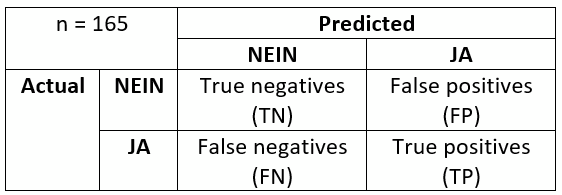<br/>
Aus diesen Matrizen lassen sich folgende Werte ableiten:
<ul>
    <li>Genauigkeit=(TP+TN)/n</li>
    <li>Fehlerrate=(FP+FN)/n</li>
    <li>Spezifität=TN/(TN+FP)</li>
    <li>Präzision=TP/(TP+FP)</li>
    <li>Sensitivität=TP/(TP+FN)</li>
    <li>Prävalenz=(FN+TP)/n</li>
</ul>
Bei größeren Matrizen werden zur Berechnung der Genauigkeit alle Werte in der Diagonalen miteinander addiert und durch die gesamte Anzahl geteilt.
In unserem Fall handelt es sich um eine 4x4 Matrix, da wir die 4 Cluster der Bonitätsklassen einander gegenüberstellen. Im Folgenden wird diese mithilfe von Python mit Hilfe der Methode confusion_matrix dargestellt. Der Methode wurden als Parameter die tatsächlichen Zielklassen und die durch die KMeans gebildeten Cluster übergeben: 

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, labels)

array([[238,   7,   5,   0],
       [  4, 232,  14,   0],
       [  3,  14, 233,   0],
       [  0,   0,   0, 250]], dtype=int64)

<AxesSubplot:>

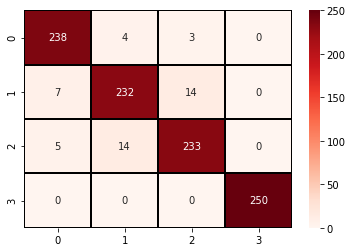

In [27]:
from seaborn import heatmap

heatmap(confusion_matrix(labels, y), cmap='Reds', linecolor='Black', linewidths='1', annot= True, fmt='g')